# Практическое задание № 2. Нейронные сети


**Работу выполнил:**

Румянцев Алексей Александрович, 368731, ПИИ R22 бак 1.1 

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [57]:
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [58]:
path = Path().resolve()
train_data = pd.read_csv(os.path.join(path, 'train.csv'))
test_data = pd.read_csv(os.path.join(path, 'test.csv'))

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [59]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [61]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [62]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [63]:
missing_value_checker(test_edited)

[]
0


In [64]:
missing_value_checker(train_edited)

[]
0


In [65]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [66]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [67]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [68]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [69]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def get_seq_model(in_dim: int, out_dim: int, hid_dim: int = None,
                  hid_num: int = None, act: str = "relu", seed: int = 40):
    if in_dim <= 0:
        raise ValueError("Input dimension must be greater than 0.")
    if out_dim <= 0:
        raise ValueError('Output dimension must be greater than 0.')
    model = keras.Sequential()
    model.add(layers.Dense(in_dim, activation = act))
    if hid_dim is not None or hid_num is not None:
        if hid_dim is None or hid_dim <= 0:
            hid_dim = in_dim
        if hid_num is None or hid_num <= 0:
            hid_num = 1
        for _ in range(hid_num):
            model.add(layers.Dense(hid_dim, activation = act))
    model.add(layers.Dense(out_dim, activation = "linear"))

    tf.random.set_seed(seed)
    
    return model

in_sz = 150
out_sz = 1
simple_model = get_seq_model(in_dim=in_sz, out_dim=out_sz)

Скомпилируйте нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [71]:

simple_model.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [72]:
simple_history = simple_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
37/37 [==============================] - 0s 1ms/step - loss: 51.1187
Epoch 2/20
37/37 [==============================] - 0s 1ms/step - loss: 12.0430
Epoch 3/20
37/37 [==============================] - 0s 1ms/step - loss: 7.9626
Epoch 4/20
37/37 [==============================] - 0s 952us/step - loss: 5.7900
Epoch 5/20
37/37 [==============================] - 0s 1ms/step - loss: 4.4903
Epoch 6/20
37/37 [==============================] - 0s 961us/step - loss: 3.6174
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 2.9860
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 2.5074
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 2.1329
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 1.8321
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 1.5867
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 1.3835
Epoch 13/20
37/37 [========================

**Оцените полученные результаты**

{'loss': [51.11872100830078, 12.043027877807617, 7.962581157684326, 5.789976596832275, 4.490290641784668, 3.6173760890960693, 2.9859728813171387, 2.5074079036712646, 2.132901668548584, 1.8321086168289185, 1.5867383480072021, 1.383453130722046, 1.212888479232788, 1.0689181089401245, 0.946013331413269, 0.8407087326049805, 0.749764621257782, 0.6710131168365479, 0.6023299694061279, 0.5422604084014893]}


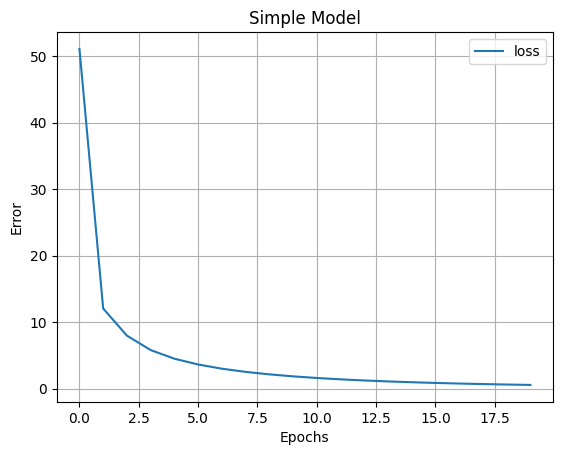

In [91]:
def show_loss(history, name: str = None):
    pd.DataFrame(history.history).plot()
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.title(name)
    plt.grid(True)
    print(history.history)

show_loss(simple_history, name='Simple Model')

In [74]:
simple_scores = simple_model.evaluate(X_val, y_val, verbose=1)
simple_scores

10/10 [==============================] - 0s 1ms/step - loss: 0.5130


0.5130195617675781

### Прогнозирование

In [75]:
simple_preds = simple_model.predict(test_edited)
simple_preds

46/46 [==============================] - 0s 750us/step


array([[ 91402.125],
       [125028.445],
       [104170.4  ],
       ...,
       [129396.93 ],
       [ 93278.836],
       [102557.71 ]], dtype=float32)

In [76]:
def get_output(preds):
    output = pd.DataFrame(
    {
        'Id': test_data['Id'],
        'OverAllCond': test_data['OverallCond'],
        'SaleCondition': test_data['SaleCondition'],
        'SalePrice': np.squeeze(preds)
    })
    return output

ans = get_output(simple_preds)
ans

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,91402.125000
1,1462,6,Normal,125028.445312
2,1463,5,Normal,104170.398438
3,1464,6,Normal,93006.523438
4,1465,5,Normal,76987.460938
...,...,...,...,...
1454,2915,7,Normal,63940.089844
1455,2916,5,Abnorml,65187.902344
1456,2917,7,Abnorml,129396.929688
1457,2918,5,Normal,93278.835938


### Эксперименты

Будем эксперементировать со значениями различных параметров. Создание, компиляция, обучение модели, построение графика функции потерь и прогноз ищутся аналогично ранее проделанным шагам.

Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.

Увеличим количество нейронов на входном слое со 150 до 500.

Epoch 1/20
37/37 [==============================] - 0s 2ms/step - loss: 11.9660
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 5.5783
Epoch 3/20
37/37 [==============================] - 0s 1ms/step - loss: 3.2975
Epoch 4/20
37/37 [==============================] - 0s 1ms/step - loss: 2.0754
Epoch 5/20
37/37 [==============================] - 0s 1ms/step - loss: 1.3859
Epoch 6/20
37/37 [==============================] - 0s 1ms/step - loss: 0.9656
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 0.6973
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 0.5195
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 0.3980
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 0.3131
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 0.2531
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 0.2104
Epoch 13/20
37/37 [=============================

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,163746.093750
1,1462,6,Normal,223855.546875
2,1463,5,Normal,188092.187500
3,1464,6,Normal,163955.859375
4,1465,5,Normal,130120.593750
...,...,...,...,...
1454,2915,7,Normal,101663.664062
1455,2916,5,Abnorml,103814.023438
1456,2917,7,Abnorml,236748.328125
1457,2918,5,Normal,162560.062500


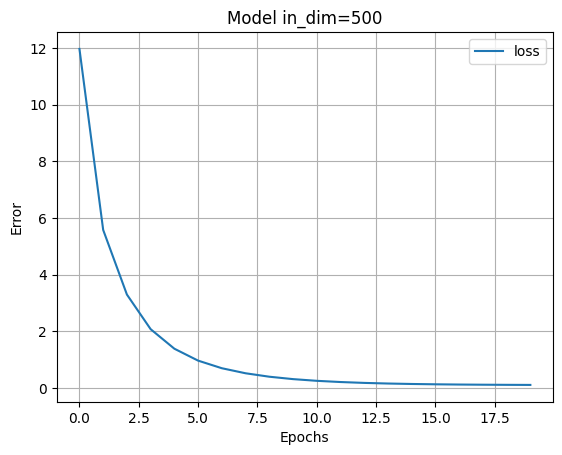

In [77]:
in_sz = 500 # Input layer dim (150->500)
out_sz = 1
model_in_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_in_500 = model_in_500.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_in_500, name=f'Model in_dim={in_sz}')

scores_in_500 = model_in_500.evaluate(X_val, y_val, verbose=1)
preds_in_500 = model_in_500.predict(test_edited)

print(f'scores_in_500={scores_in_500}')
ans = get_output(preds_in_500)
ans

Увеличим количество нейронов на входном слое с 500 до 1000.

Epoch 1/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 5/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 8/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 13/20
37/37 [======

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,-821.594604
1,1462,6,Normal,-465.370544
2,1463,5,Normal,-994.512756
3,1464,6,Normal,-722.277527
4,1465,5,Normal,-468.821503
...,...,...,...,...
1454,2915,7,Normal,-380.328888
1455,2916,5,Abnorml,-404.116394
1456,2917,7,Abnorml,-1418.564819
1457,2918,5,Normal,-767.718567


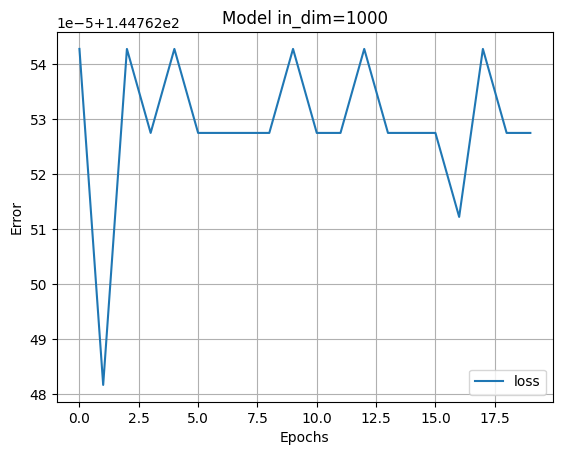

In [78]:
in_sz = 1000 # Input layer dim (500->1000)
out_sz = 1
model_in_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_in_1000 = model_in_1000.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_in_1000, name=f'Model in_dim={in_sz}')

scores_in_1000 = model_in_1000.evaluate(X_val, y_val, verbose=1)
preds_in_1000 = model_in_1000.predict(test_edited)

print(f'scores_in_1000={scores_in_1000}')
ans = get_output(preds_in_1000)
ans

С увеличением нейронов на входном слое функция потерь быстрее убывает, то есть уменьшается ошибка.

Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.

Добавим один скрытый слой с 100 нейронами.

Epoch 1/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7565
Epoch 2/20
37/37 [==============================] - 0s 1ms/step - loss: 16.3846
Epoch 3/20
37/37 [==============================] - 0s 1ms/step - loss: 4.9715
Epoch 4/20
37/37 [==============================] - 0s 1ms/step - loss: 2.1174
Epoch 5/20
37/37 [==============================] - 0s 1ms/step - loss: 0.8665
Epoch 6/20
37/37 [==============================] - 0s 994us/step - loss: 0.3569
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1711
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1199
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1109
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1086
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1063
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1042
Epoch 13/20
37/37 [=========================

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,157883.796875
1,1462,6,Normal,202674.765625
2,1463,5,Normal,189309.875000
3,1464,6,Normal,176293.062500
4,1465,5,Normal,153906.484375
...,...,...,...,...
1454,2915,7,Normal,123778.656250
1455,2916,5,Abnorml,128145.695312
1456,2917,7,Abnorml,217731.453125
1457,2918,5,Normal,154828.359375


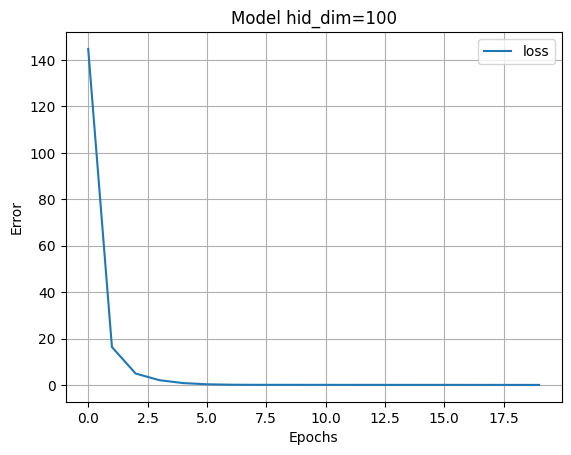

In [79]:
in_sz = 150
hid_sz = 100 # Hidden layer dim
out_sz = 1
model_hid_100 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_100 = model_hid_100.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_100, name=f'Model hid_dim={hid_sz}')

scores_hid_100 = model_hid_100.evaluate(X_val, y_val, verbose=1)
preds_hid_100 = model_hid_100.predict(test_edited)

print(f'scores_hid_100={scores_hid_100}')
ans = get_output(preds_hid_100)
ans

Увеличим количество нейронов на скрытом слое со 100 до 500.

Epoch 1/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 144.7625
Epoch 3/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 4/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 5/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 6/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 144.7625
Epoch 13/20
37/37 [======

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,-782.524536
1,1462,6,Normal,-1181.391479
2,1463,5,Normal,-855.065125
3,1464,6,Normal,-596.737244
4,1465,5,Normal,-399.117432
...,...,...,...,...
1454,2915,7,Normal,-364.614166
1455,2916,5,Abnorml,-370.166229
1456,2917,7,Abnorml,-1318.132446
1457,2918,5,Normal,-740.156738


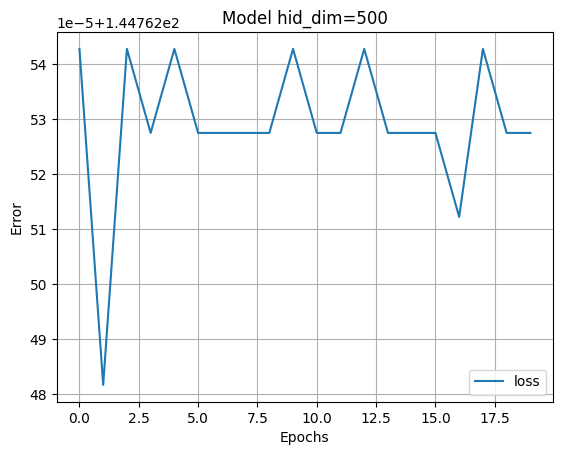

In [80]:
in_sz = 150
hid_sz = 500 # Hidden layer dim (100->500)
out_sz = 1
model_hid_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_500 = model_hid_500.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_500, name=f'Model hid_dim={hid_sz}')

scores_hid_500 = model_hid_500.evaluate(X_val, y_val, verbose=1)
preds_hid_500 = model_hid_500.predict(test_edited)

print(f'scores_hid_500={scores_hid_500}')
ans = get_output(preds_hid_500)
ans

Увеличим количество нейронов на скрытом слое с 500 до 1000.

Epoch 1/20
37/37 [==============================] - 0s 3ms/step - loss: 6.5001
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 0.6244
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 0.1198
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 0.1058
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0989
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0820
Epoch 8/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 9/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 10/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 11/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 12/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 13/20
37/37 [==============================

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,141733.656250
1,1462,6,Normal,176615.953125
2,1463,5,Normal,189932.765625
3,1464,6,Normal,189083.765625
4,1465,5,Normal,163162.078125
...,...,...,...,...
1454,2915,7,Normal,88941.421875
1455,2916,5,Abnorml,105193.687500
1456,2917,7,Abnorml,186943.812500
1457,2918,5,Normal,105997.937500


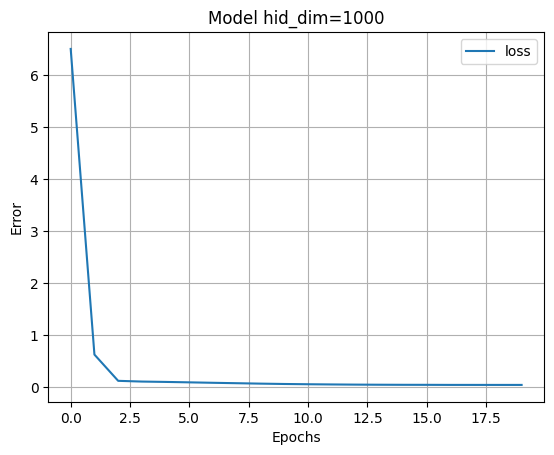

In [81]:
in_sz = 150
hid_sz = 1000 # Hidden layer dim (500->1000)
out_sz = 1
model_hid_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_1000 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_1000, name=f'Model hid_dim={hid_sz}')

scores_hid_1000 = model_hid_1000.evaluate(X_val, y_val, verbose=1)
preds_hid_1000 = model_hid_1000.predict(test_edited)

print(f'scores_hid_1000={scores_hid_1000}')
ans = get_output(preds_hid_1000)
ans

При увеличении нейронов скрытых слоев функция потерь быстрее убывает, следовательно ошибка уменьшается.

Используйте разное количество эпох. Опишите достигнутый результат.

Epoch 1/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 1/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 3/50
37/37 [==============================] -

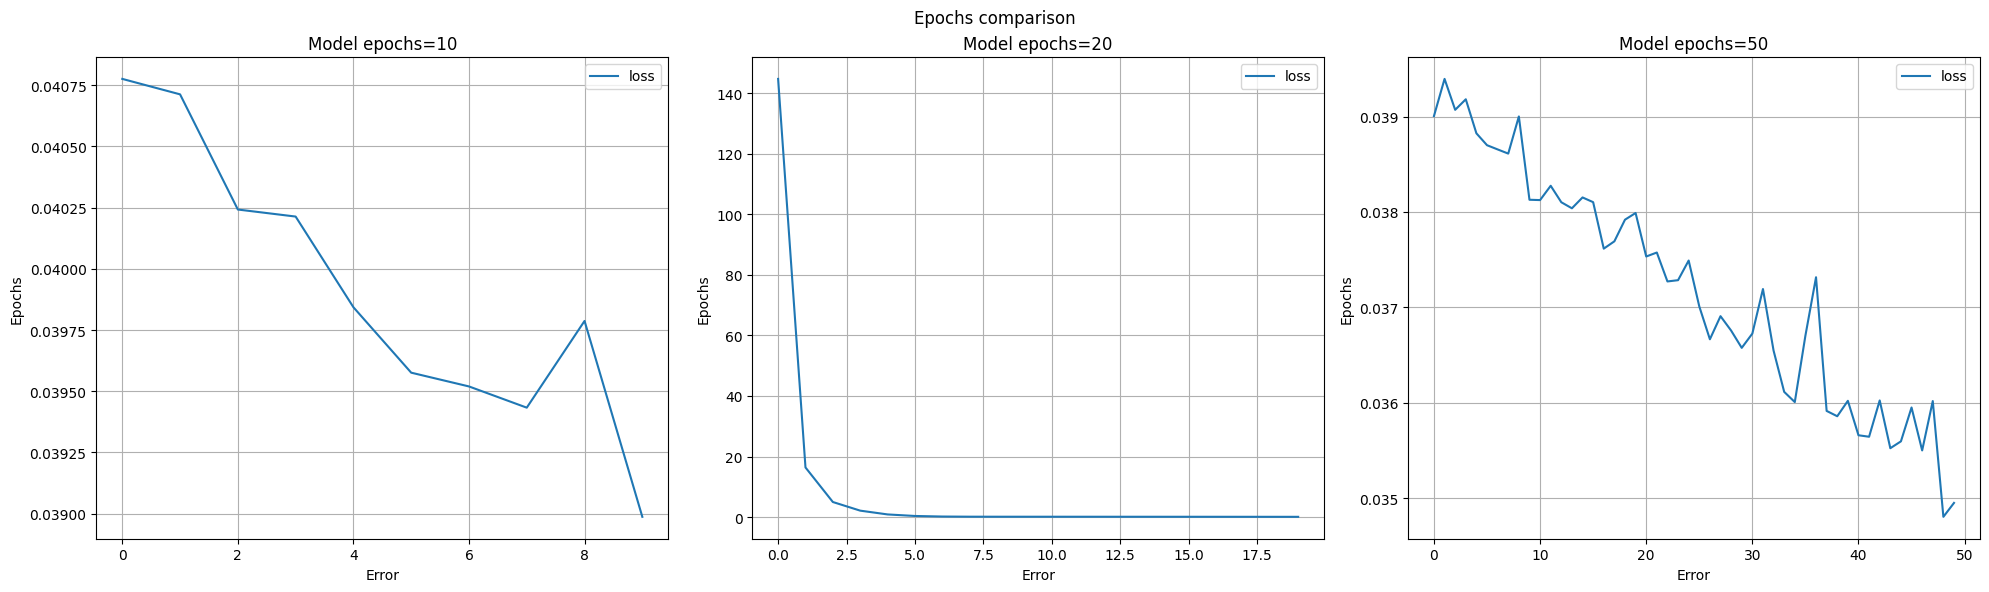

In [82]:
def show_loss3(history1, history2, history3, ttl, name1, name2, name3):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    pd.DataFrame(history1.history).plot(ax=axes[0])
    axes[0].set_title(f'{name1}')
    axes[0].set_xlabel('Error')
    axes[0].set_ylabel('Epochs')
    axes[0].grid(True)
    pd.DataFrame(history2.history).plot(ax=axes[1])
    axes[1].set_title(f'{name2}')
    axes[1].set_xlabel('Error')
    axes[1].set_ylabel('Epochs')
    axes[1].grid(True)
    pd.DataFrame(history3.history).plot(ax=axes[2])
    axes[2].set_title(f'{name3}')
    axes[2].set_xlabel('Error')
    axes[2].set_ylabel('Epochs')
    axes[2].grid(True)

    fig.suptitle(ttl)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) 


history_hid_100_2 = model_hid_1000.fit(X_train, y_train, epochs=10, batch_size=32)
history_hid_100_3 = model_hid_1000.fit(X_train, y_train, epochs=50, batch_size=32)
name1, name2, name3 = 'Model epochs=10', 'Model epochs=20', 'Model epochs=50'
show_loss3(history_hid_100_2, history_hid_100, history_hid_100_3, 'Epochs comparison', name1, name2, name3)

При маленьком количестве эпох потери уменьшаются только частично, график нерегулярный -- модель не успевала стабилизироваться -- недостаточное обучение. При большом количестве эпох модель подгоняется под шум и выбросы данных. Среднее значение дало наилучший результат.

Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.

Epoch 1/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 2/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 3/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 4/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 5/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 6/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 7/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 8/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 9/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 10/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 11/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 12/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 13/20
117/117 [====

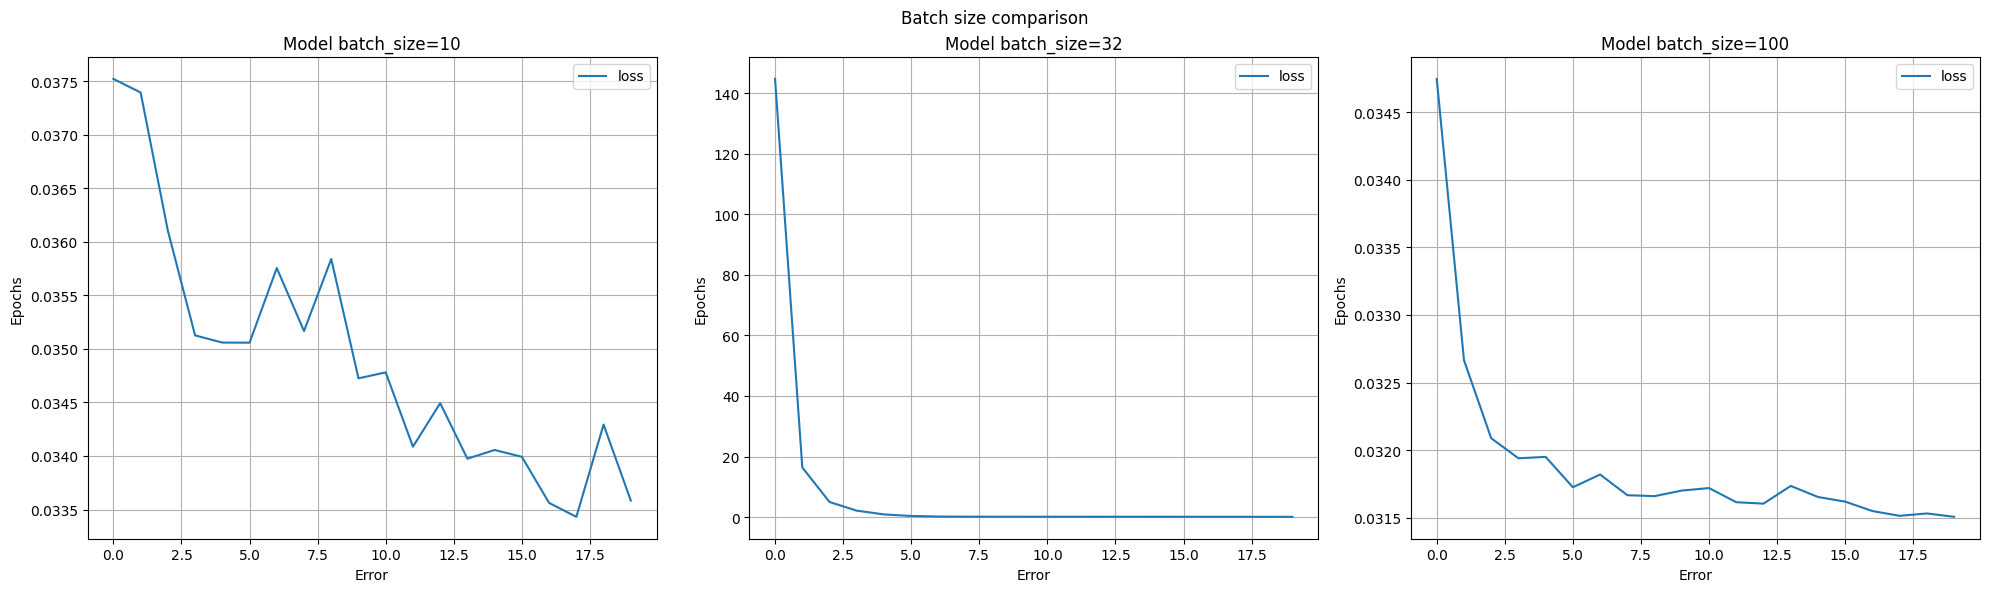

In [83]:
history_hid_100_4 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=10)
history_hid_100_5 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=100)
name1, name2, name3 = 'Model batch_size=10', 'Model batch_size=32', 'Model batch_size=100'
show_loss3(history_hid_100_4, history_hid_100, history_hid_100_5, 'Batch size comparison', name1, name2, name3)

При маленьком `batch_size` появляются флуктации в градиентах, так как они зависят от небольших случайных выборок. Весы часто обновляются, для хорошего результата нужно увеличить количество эпох. При среднем значении график нормальный. При больших значениях веса обновляются слишком редко, модель хуже адаптируется к локальным особенностям данных.

Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.

Сравним оптимизаторы `sgd`, `rmsprop` и `adam`.

Epoch 1/20
37/37 [==============================] - 0s 2ms/step - loss: 20.1454
Epoch 2/20
37/37 [==============================] - 0s 1ms/step - loss: 17.9331
Epoch 3/20
37/37 [==============================] - 0s 1ms/step - loss: 16.6680
Epoch 4/20
37/37 [==============================] - 0s 1ms/step - loss: 15.2779
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: 13.6844
Epoch 6/20
37/37 [==============================] - 0s 1ms/step - loss: 11.7758
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 9.2311
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 5.2740
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 0.5831
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 0.2033
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1982
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1898
Epoch 13/20
37/37 [========================

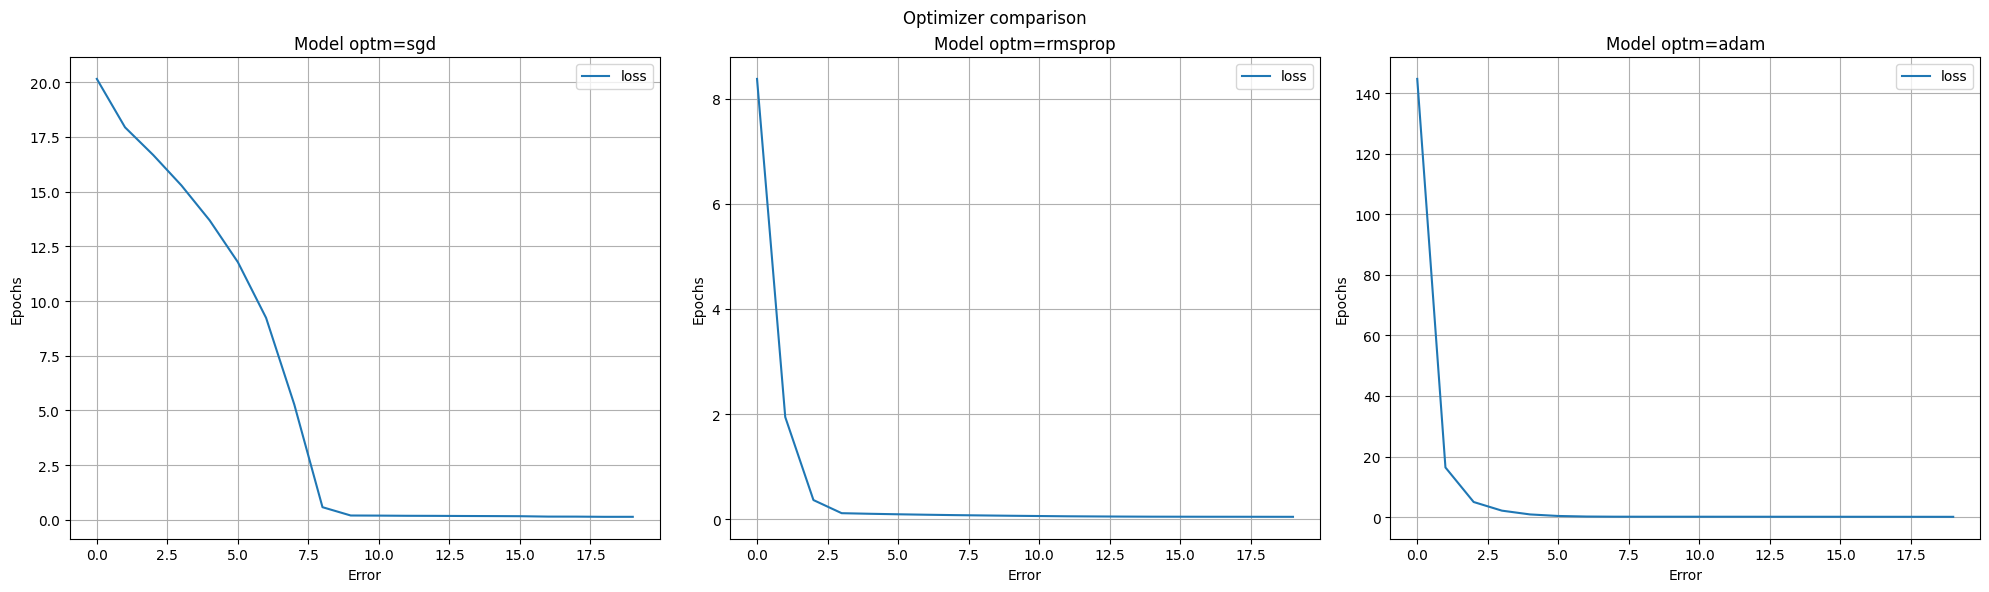

In [89]:
in_sz = 150
hid_sz = 100
out_sz = 1
model_hid_100_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new.compile(optimizer='sgd', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer

history_hid_100_new = model_hid_100_new.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new = model_hid_100_new.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new = model_hid_100_new.predict(test_edited)

ans1 = get_output(preds_hid_100_new)

model_hid_100_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new_2.compile(optimizer='rmsprop', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer

history_hid_100_new_2 = model_hid_100_new_2.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new_2 = model_hid_100_new_2.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new_2 = model_hid_100_new_2.predict(test_edited)

ans2 = get_output(preds_hid_100_new_2)

name1, name2, name3 = 'Model optm=sgd', 'Model optm=rmsprop', 'Model optm=adam'
print(f'scores_hid_100_new={scores_hid_100_new}\nscores_hid_100_new_2={scores_hid_100_new_2}')
print(ans1)
print(ans2)
show_loss3(history_hid_100_new, history_hid_100_new_2, history_hid_100, 'Optimizer comparison', name1, name2, name3)

Лучше всего получился результат с `rmsprop`, хуже всего с `sgd`, `adam` посередине.

Сравним функции потерь `MAE`, `Huber` и `MSLE`.

Epoch 1/20
37/37 [==============================] - 0s 2ms/step - loss: 167962.6719
Epoch 2/20
37/37 [==============================] - 0s 1ms/step - loss: 92221.7812
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 49448.5781
Epoch 4/20
37/37 [==============================] - 0s 1ms/step - loss: 46020.5117
Epoch 5/20
37/37 [==============================] - 0s 1ms/step - loss: 43292.7734
Epoch 6/20
37/37 [==============================] - 0s 1ms/step - loss: 40438.1367
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 37360.8320
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 34353.7383
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 31974.4902
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 29911.7266
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 29049.0957
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 28365.8828


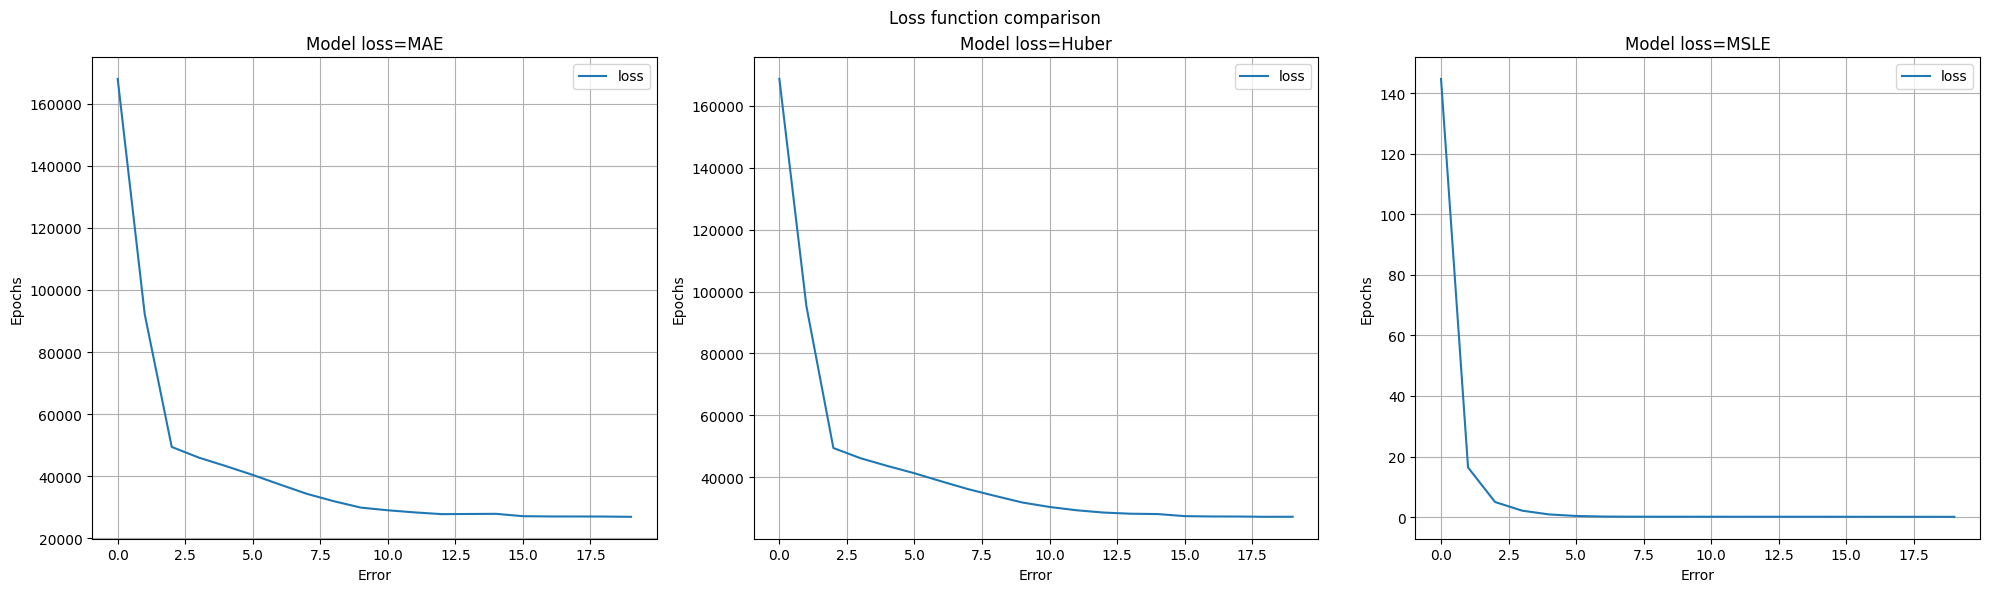

In [90]:
in_sz = 150
hid_sz = 100
out_sz = 1
model_hid_100_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError())

history_hid_100_new = model_hid_100_new.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new = model_hid_100_new.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new = model_hid_100_new.predict(test_edited)

ans1 = get_output(preds_hid_100_new)

model_hid_100_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new_2.compile(optimizer='adam', loss=keras.losses.Huber()) 

history_hid_100_new_2 = model_hid_100_new_2.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new_2 = model_hid_100_new_2.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new_2 = model_hid_100_new_2.predict(test_edited)

ans2 = get_output(preds_hid_100_new_2)

name1, name2, name3 = 'Model loss=MAE', 'Model loss=Huber', 'Model loss=MSLE'
print(f'scores_hid_100_new={scores_hid_100_new}\nscores_hid_100_new_2={scores_hid_100_new_2}')
print(ans1)
print(ans2)
show_loss3(history_hid_100_new, history_hid_100_new_2, history_hid_100, 'Loss function comparison', name1, name2, name3)

Результат с `MSLE` получился более "спокойный" вследствие логарифмирования. `Huber` (комбинация `MAE` и `MSE`) и `MAE` очень похожи друг на друга.

## Вопросы

Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?

Эпоха — это один полный проход по всему набору данных, используемых для обучения модели. Во время одной эпохи модель обучается на всех обучающих примерах. Если данные большие, то они могут быть разбиты на меньшие части, называемые батчами. Одна эпоха может состоять из нескольких итераций, если данные разбиты на батчи. Итерация — это один шаг процесса обучения, который соответствует обработке одного батча данных. В каждой итерации модель обновляет свои веса, используя информацию из текущего батча. Число итераций на одну эпоху зависит от размера данных и размера батча.

Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?

Функция активации — это математическая функция, которая используется в нейронных сетях для преобразования входного сигнала нейрона (взвешенной суммы входных данных) в выходной сигнал. Функция активации определяет, будет ли нейрон "активирован" (то есть, передаст ли он сигнал дальше в сети), или нет, основываясь на входных данных. Функции активации управляют потоком информации между нейронами. Они помогают решать, какую информацию нейрон должен передавать в следующий слой, а какую — отбросить. Таким образом, функции активации позволяют нейронной сети обучаться более сложным, нелинейным зависимостям в данных. Виды: сигмоида, гиперболический тангенс, ReLU.

Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.

MSE — это среднее значение квадратов ошибок предсказаний модели. Ошибка считается как разница между реальным значением и предсказанным значением. Квадрат ошибки усиливает влияние крупных отклонений (MSE чувствительным к выбросам). MSE часто используется в оптимизации моделей, таких как линейная регрессия или нейронные сети, так как оно является дифференцируемым и дает гладкую кривую потерь, что помогает эффективно обучать модели. MAE — это среднее значение абсолютных ошибок предсказаний модели. Ошибка в данном случае считается как разница между реальным и предсказанным значением, но без возведения в квадрат. MAE измеряет среднюю величину ошибок без учета их направления (положительное или отрицательное), и не усиливает влияние больших ошибок так, как это делает MSE (MAE более устойчив к выбросам). MAE используется в случаях, когда важно, чтобы ошибка предсказания была в одинаковой степени чувствительна ко всем отклонениям.